# HEALPix coordinate and plot examples

## Setup

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from astropy.visualization.wcsaxes import WCSAxes
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy.wcs import WCS
import numpy as np
import healpy as hp
from scipy.ndimage import gaussian_filter 

In [4]:
# Get an example image
hdu_list = fits.open('https://github.com/gammapy/gammapy-extra/blob/master/datasets/catalogs/fermi/gll_psch_v08.fit.gz?raw=true')
hdu_list.info()
wcs = WCS(hdu_list[0].header)

# wcs = wcs.all_pix2world
wcs
(hdu_list[0].header)
# fig = plt.figure()
# ax = WCSAxes(fig, [1, 1, 1, 1], wcs=wcs)

data = np.sqrt(gaussian_filter(hdu_list[0].data.astype('float'), 5))

Filename: /home/adeel/.astropy/cache/download/py3/60f2f72841cc6217da6a4de0af155b6e
No.    Name         Type      Cards   Dimensions   Format
  0  Count Map   PrimaryHDU     109   (3600, 1800)   int32   
  1  2FHL Source Catalog  BinTableHDU    164   360R x 39C   [18A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 2E, E, E, 2E, E, E, 2E, E, E, E, E, I, 25A, E, E, 8A, E, E, 18A, 18A, 18A]   
  2  Extended Sources  BinTableHDU     51   25R x 10C   [18A, E, E, E, E, 25A, E, E, I, 25A]   
  3  ROIs        BinTableHDU     39   154R x 6C   [I, E, E, E, E, E]   


## Plot image and draw markers at given positions

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':
/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


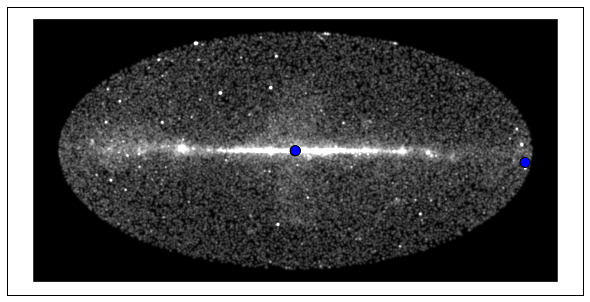

In [5]:
fig = plt.figure(figsize=(8, 6))
ax = WCSAxes(fig, [1, 1, 1, 1], wcs=wcs)
fig.add_axes(ax)
plt.imshow(data, cmap='gray', vmax=0.4, origin='lower')

# Plot marker for Crab Nebula in RADEC coordinates
c = SkyCoord(083.63308, +22.01450, frame='icrs', unit='deg')
plt.scatter(c.data.lon.deg, c.data.lat.deg, s=100, transform=ax.get_transform('icrs'))

# Plot marker for Galactic center in GALACTIC coordinates
c = SkyCoord(0, 0, frame='galactic', unit='deg')
plt.scatter(c.data.lon.deg, c.data.lat.deg, s=100, transform=ax.get_transform('galactic'))

# Of course, we can also draw markers at given pixel positions
plt.scatter(1800.5, 900.5, s=100)

# We could use the `wcs` object to transform pixel to Galactic sky coordinates
# or the other way back.

## Compute and plot markers at HEALPix pixel centers

We will use the following healpy functions:

* http://healpy.readthedocs.io/en/latest/generated/healpy.pixelfunc.order2nside.html
* http://healpy.readthedocs.io/en/latest/generated/healpy.pixelfunc.pix2ang.html

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':
/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


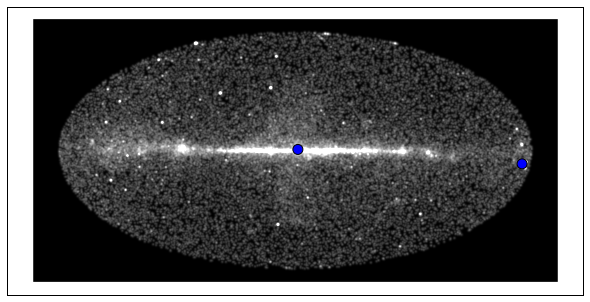

In [6]:
import healpy
fig = plt.figure(figsize=(8, 6))
ax = WCSAxes(fig, [1, 1, 1, 1], wcs=wcs)
fig.add_axes(ax)
plt.imshow(data, cmap='gray', vmax=0.4, origin='lower')

# For the Crab Nebula, HiPS has order 3 and ipix = 377
nside = healpy.order2nside(order=3)
ra, dec = healpy.pix2ang(nside=nside, ipix=377, nest=True, lonlat=True)
plt.scatter(ra, dec, s=100, transform=ax.get_transform('icrs'))

# For the galactic center, HiPS has order 3 and ipix = 450
nside = healpy.order2nside(order=3)
ra, dec = healpy.pix2ang(nside=nside, ipix=450, nest=True, lonlat=True)
plt.scatter(ra, dec, s=100, transform=ax.get_transform('icrs'))

## Compute and plot markers at HEALPix pixel corners

We will use the following healpy functions:

* http://healpy.readthedocs.io/en/latest/generated/healpy.boundaries.html
* http://healpy.readthedocs.io/en/latest/generated/healpy.pixelfunc.vec2ang.html

In [7]:
# First let's do the computation and print out coordinates
# to understand how healpy works
nside = healpy.order2nside(order=3)
print(nside)
coords = healpy.boundaries(nside=nside, pix=450, nest=True)
theta, phi = healpy.vec2ang(np.transpose(coords), lonlat=False)
radec = SkyCoord(ra=phi, dec=np.pi/2 - theta, unit='radian', frame='icrs')
# print(np.array(str(val for radec.data.lon.deg).rsplit(' ', 1)))
xvv = (str(radec.data.lon.deg).split())
print(type(xvv))
print(radec.data.lat.deg)
print(theta)
print((str(theta).join(",")))
new = tuple(float(x) for x in theta)
print(list(new))
# asad = [1,2,3]
# assert asad == asad

8
<class 'list'>
[-24.62431835 -30.         -35.68533471 -30.        ]
[ 2.00057176  2.0943951   2.19362291  2.0943951 ]
,
[2.0005717580994244, 2.0943951023931957, 2.1936229122068998, 2.0943951023931957]


[ 264.375  258.75   264.375  270.   ]
[-24.62431835 -30.         -35.68533471 -30.        ]
<SkyCoord (ICRS): (ra, dec) in deg
    [( 264.375, -24.62431835), ( 258.75 , -30.        ),
     ( 264.375, -35.68533471), ( 270.   , -30.        )]>
[-24.624318352164089, -30.000000000000018]


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':
/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


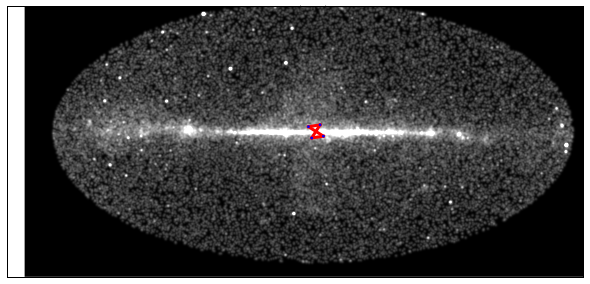

In [15]:
# Let's plot the image again, and this time markers at the
# HEALPix pixel corners
fig = plt.figure(figsize=(8, 6))
ax = WCSAxes(fig, [1, 1, 1, 1], wcs=wcs)
fig.add_axes(ax)
lon = radec.data.lon.deg
lat = radec.data.lat.deg

print(radec.data.lon.deg)
print(radec.data.lat.deg)
print(radec.)
print([lat[0], lat[1]])
ax.plot([lon[0], lon[1]], [lat[0], lat[1]], 'r', lw=3, transform=ax.get_transform('icrs'), zorder=1)
ax.plot([lon[2], lon[3]], [lat[2], lat[3]], 'r', lw=3, transform=ax.get_transform('icrs'), zorder=1)

ax.scatter([lon[0], lon[2]], [lat[0], lat[2]], s=3, transform=ax.get_transform('icrs'), color='blue', zorder=2)

ax.plot([lon[1], lon[3]], [lat[1], lat[3]], 'r', lw=3, transform=ax.get_transform('icrs'), zorder=1)
ax.plot([lon[0], lon[2]], [lat[0], lat[2]], 'r', lw=3, transform=ax.get_transform('icrs'), zorder=1)

ax.scatter([lon[1], lon[3]], [lat[1], lat[3]], s=3, transform=ax.get_transform('icrs'), color='blue', zorder=2)

ax.set_xlim(-110.5, data.shape[1] - 110.5)
ax.set_ylim(-0.5, data.shape[0] - 110.5)
ax.imshow(data, cmap='gray', vmax=0.4, origin='lower')

In [9]:
# This looks weird.
# But it might be correct?
# Note that we have HEALPix pixels in RADEC coordinates,
# drawn on a GALACTIC sky image.

NameError: name 'datata' is not defined

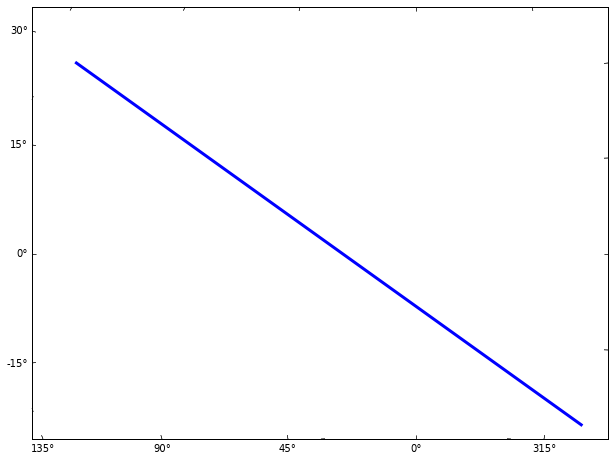

In [10]:
# Adeel: please draw lines connecting the corners,
# and also draw markers for the poles (i.e. declination +90 and -90 in RADEC coordinates)
# And then start drawing more HEALPix pixels (or all of them)

fig = plt.figure(figsize=(8, 6))
ax = WCSAxes(fig, [1, 1, 1, 1], wcs=wcs)
fig.add_axes(ax)

plt.plot([0, 0], [90, -90], lw=3, transform=ax.get_transform('icrs'), color='blue')
plt.imshow(datata, cmap='gray', vmax=0.4, origin='lower')

# Also try other HEALPix orders, e.g. change to order 2 or 4.

# Let me know if you have any questions / issues.

In [ ]:
# Using order = 4
nside = healpy.order2nside(order=4)
coords = healpy.boundaries(nside=nside, pix=450, nest=True)
theta, phi = healpy.vec2ang(np.transpose(coords), lonlat=False)
radec = SkyCoord(ra=phi, dec=np.pi/2 - theta, unit='radian', frame='icrs')

fig = plt.figure(figsize=(8, 6))
ax = WCSAxes(fig, [1, 1, 1, 1], wcs=wcs)
fig.add_axes(ax)

plt.plot(radec.data.lon.deg, radec.data.lat.deg, 'r', lw=1, transform=ax.get_transform('icrs'))
plt.scatter(radec.data.lon.deg, radec.data.lat.deg, s=3, transform=ax.get_transform('icrs'), color='blue')
plt.imshow(data, cmap='gray', vmax=0.4, origin='lower')

In [ ]:
# Using order = 3
nside = healpy.order2nside(order=3)
coords = healpy.boundaries(nside=nside, pix=46, nest=True)
theta, phi = healpy.vec2ang(np.transpose(coords), lonlat=False)
radec = SkyCoord(ra=phi, dec=np.pi/2 - theta, unit='radian', frame='icrs')

fig = plt.figure(figsize=(8, 6))
ax = WCSAxes(fig, [1, 1, 1, 1], wcs=wcs)
fig.add_axes(ax)

plt.plot(radec.data.lon.deg, radec.data.lat.deg, 'r', lw=3, transform=ax.get_transform('icrs'))
plt.scatter(radec.data.lon.deg, radec.data.lat.deg, s=120, transform=ax.get_transform('icrs'), color='blue')
plt.imshow(data, cmap='gray', vmax=0.4, origin='lower')

In [ ]:
# Fetching HiPS tile
hips_tile_hdu = fits.open('https://github.com/hipspy/hips-extra/blob/master/datasets/samples/DSS2Red/Norder3/Dir0/Npix450.fits?raw=true')
hips_tile_hdu.info()
wcs = WCS(hips_tile_hdu[0].header)
data = np.sqrt(gaussian_filter(hips_tile_hdu[0].data.astype('float'), 2)) # applying a gaussian blur

nside = healpy.order2nside(order=3)
coords = healpy.boundaries(nside=nside, pix=450, nest=True)
theta, phi = healpy.vec2ang(np.transpose(coords), lonlat=False)
radec = SkyCoord(ra=phi, dec=np.pi/2 - theta, unit='radian', frame='icrs')

# using scipy's affine transformation function
from scipy.ndimage.interpolation import affine_transform

matrix = np.column_stack((radec.data.lon.deg, radec.data.lat.deg))
matrix = np.array(matrix)
print(matrix.flatten())
# data is a 512x512 array and matrix is a 4x2 array
transformed_image = affine_transform(data, matrix.flatten())

plt.imshow(transformed_image, cmap='gray', vmax=0.4, origin='lower')